In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

# cpu_performance

# CPU relative performance prediction

can you predict the perfromance of a cpu based on the data given [here](http://archive.ics.uci.edu/ml/datasets/Computer+Hardware)

![cpu](res/cpu.jpg)


In [19]:
cpu_performance = pd.read_csv('cpu performance/machine_data.csv');

1. vendor name: 30 (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, sratus, wang) 
2. Model Name: many unique symbols 
3. MYCT: machine cycle time in nanoseconds (integer) 
4. MMIN: minimum main memory in kilobytes (integer) 
5. MMAX: maximum main memory in kilobytes (integer) 
6. CACH: cache memory in kilobytes (integer) 
7. CHMIN: minimum channels in units (integer) 
8. CHMAX: maximum channels in units (integer) 
9. PRP: published relative performance (integer) 
10. ERP: estimated relative performance from the original article (integer)

In [20]:
cpu_performance.corr()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
MYCT,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396
MMIN,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292
MMAX,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202
CACH,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620
CHMIN,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580
CHMAX,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156
PRP,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472
ERP,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000


In [21]:
cpu_performance

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
5,amdahl,470v/b,26,8000,32000,64,8,32,318,290
6,amdahl,580-5840,23,16000,32000,64,16,32,367,381
7,amdahl,580-5850,23,16000,32000,64,16,32,489,381
8,amdahl,580-5860,23,16000,64000,64,16,32,636,749
9,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238


In [22]:
# first split your dependant and independant variables
training_data = cpu_performance.iloc[:, [3,4,8]].values
goal_data = cpu_performance.iloc[:, -1].values

In [23]:
def getPolynomial(data, degree=1):
    if degree ==1:
        return data
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree= degree)
    poly_features = poly.fit_transform(data)
    return poly_features

In [70]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(training_data, goal_data, test_size=0.2, random_state = 0)

In [71]:
degree = 3

In [72]:
model = LinearRegression()
model.fit(getPolynomial(X_train , degree),Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
Y_predict = model.predict(getPolynomial(X_test,degree))

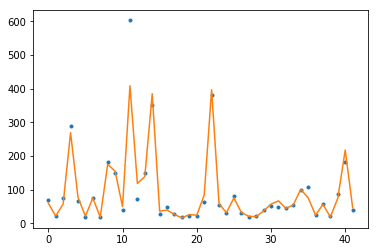

In [76]:
plt.plot(Y_test, '.', Y_predict, '-')
plt.show()

In [77]:
model.score(getPolynomial(X_train,degree) , Y_train)

0.9923676267540961

# Time Analysis prediction 

using the regrssion techniques can you predict the future of the [stock](../datasets/Financial Data - Forex.zip) market based on the history of it ?

![Time analysis](res/timeseries.png)


In [81]:
financial_data = pd.read_csv('Financial_Data/Financial Data - Forex/EURUSD_15m_BID_01.01.2010-31.12.2016.csv');

In [86]:
dm = financial_data.copy()
dd = financial_data.copy()

In [89]:
financial_data['Time'] = pd.to_datetime(financial_data.Time)
dm['Time'] = pd.to_datetime(dm.Time)
dd['Time'] = pd.to_datetime(dd.Time)

In [92]:
financial_data.set_index(financial_data.Time , inplace=True)
dm.set_index(dm.Time , inplace=True)
dd.set_index(dd.Time , inplace=True)

In [98]:
# resample df dataframe by the year
financial_data = financial_data.resample('Y').mean()
# resample df dataframe by the month
dm = dm.resample('M').mean()
# resample df dataframe by the day
dd = dd.resample('D').mean()

# Yearly

In [103]:
financial_data.corr()

,Open,High,Low,Close,Volume
Open,1.000000,1.000000,0.999999,1.000000,-0.572849
High,1.000000,1.000000,0.999998,1.000000,-0.573078
Low,0.999999,0.999998,1.000000,0.999999,-0.572562
Close,1.000000,1.000000,0.999999,1.000000,-0.572845
Volume,-0.572849,-0.573078,-0.572562,-0.572845,1.000000


In [168]:
# first split your dependant and independant variables
finance_training_data = financial_data.iloc[:, [1,2,3]].values
finance_goal_data = financial_data.iloc[:, 0].values

In [169]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(finance_training_data, finance_goal_data, test_size=0.2, random_state = 0)

In [170]:
degree_1 = 2

In [171]:
model_1 = LinearRegression()
model_1.fit(getPolynomial(X_train_1 , degree_1),Y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [172]:
Y_predict_1 = model_1.predict(getPolynomial(X_test_1,degree_1))

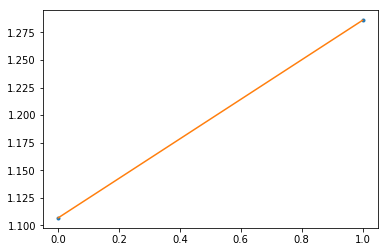

In [173]:
plt.plot(Y_test_1, '.', Y_predict_1, '-')
plt.show()

In [174]:
model_1.score(getPolynomial(X_train_1,degree_1) , Y_train_1)

1.0

In [175]:
Y_predict_1

array([1.10681115, 1.28593946])

# Monthly

In [176]:
dm.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999999,0.999999,1.000000,-0.341760
High,0.999999,1.000000,0.999998,0.999999,-0.341980
Low,0.999999,0.999998,1.000000,0.999999,-0.341507
Close,1.000000,0.999999,0.999999,1.000000,-0.341759
Volume,-0.341760,-0.341980,-0.341507,-0.341759,1.000000


In [199]:
dm_training_data = dm.iloc[:, [1,2,3]].values
dm_goal_data = dm.iloc[:, 0].values

In [180]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(dm_training_data, dm_goal_data, test_size=0.2, random_state = 0)

In [193]:
degree_2 = 2

In [194]:
model_2 = LinearRegression()
model_2.fit(getPolynomial(X_train_2 , degree_2),Y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [195]:
Y_predict_2 = model_2.predict(getPolynomial(X_test_2,degree_2))

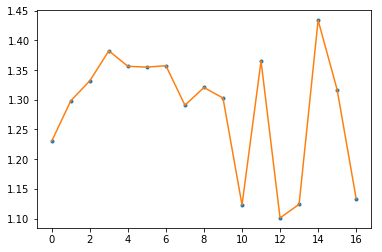

In [196]:
plt.plot(Y_test_2, '.', Y_predict_2, '-')
plt.show()

In [197]:
model_2.score(getPolynomial(X_train_2,degree_2) , Y_train_2)

0.9999999939231152

# Daily

In [201]:
dd.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999997,0.999997,1.000000,-0.224035
High,0.999997,1.000000,0.999988,0.999997,-0.223133
Low,0.999997,0.999988,1.000000,0.999997,-0.224904
Close,1.000000,0.999997,0.999997,1.000000,-0.224034
Volume,-0.224035,-0.223133,-0.224904,-0.224034,1.000000


In [202]:
dd_training_data = dd.iloc[:, [1,2,3]].values
dd_goal_data = dd.iloc[:, 0].values


In [203]:
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(dd_training_data, dd_goal_data, test_size=0.2, random_state = 0)

In [204]:
degree_3 = 2

In [205]:
model_3 = LinearRegression()
model_3.fit(getPolynomial(X_train_3 , degree_3),Y_train_3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [206]:
Y_predict_3 = model_3.predict(getPolynomial(X_test_3,degree_3))

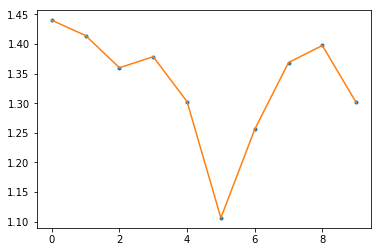

In [210]:
plt.plot(Y_test_3[:10], '.', Y_predict_3[:10], '-')
plt.show()

In [211]:
model_3.score(getPolynomial(X_train_3,degree_3) , Y_train_3)

0.9999998625776005